In [1]:
import nltk
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter

/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/navarra/snap/jupyter/6/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/navarra/snap/jupyter/6/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/navarra/snap/jupyter/6/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
f = open("data.txt", "r", encoding = 'latin-1')

In [5]:
text = f.read()

In [6]:
text[:1000]

"The Project Gutenberg EBook of Man to Man, by Jackson Gregory\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Man to Man\n\nAuthor: Jackson Gregory\n\nRelease Date: July 29, 2006 [EBook #18933]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK MAN TO MAN ***\n\n\n\n\nProduced by Al Haines\n\n\n\n\n\n\n\n\n\n\n[Frontispiece: The blazing heat was such that men and horses and steers\nsuffered terribly.]\n\n\n\n\n\n\nMAN TO MAN\n\n\nBY\n\nJACKSON GREGORY\n\n\n\nAUTHOR OF\n\nJUDITH OF BLUE LAKE RANCH, THE BELLS OF SAN JUAN, SIX FEET FOUR, ETC.\n\n\n\n\nILLUSTRATED BY\n\nJ. G. SHEPHERD\n\n\n\n\n\nGROSSET & DUNLAP\n\nPUBLISHERS -------- NEW YORK\n\n\n\n\nCOPYRIGHT, 1920, BY\n\nCHARLES SCRIBNER'S SONS\n\n\nPublished October, 1920\n\n\n\n\nCONTENTS\n\n\nCHAPTER

In [7]:
len(text)

436574

## Sentence Tokenize

In [8]:
sentences = sent_tokenize(text.lower())

In [9]:
len(sentences)

5551

In [10]:
sentences[0 : 2]

['the project gutenberg ebook of man to man, by jackson gregory\n\nthis ebook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.',
 'you may copy it, give it away or\nre-use it under the terms of the project gutenberg license included\nwith this ebook or online at www.gutenberg.org\n\n\ntitle: man to man\n\nauthor: jackson gregory\n\nrelease date: july 29, 2006 [ebook #18933]\n\nlanguage: english\n\n\n*** start of this project gutenberg ebook man to man ***\n\n\n\n\nproduced by al haines\n\n\n\n\n\n\n\n\n\n\n[frontispiece: the blazing heat was such that men and horses and steers\nsuffered terribly.]']

In [11]:
corpus = []
for i in sentences:
    sent = word_tokenize(i)
    corpus.append(sent)

In [12]:
corpus[0 : 2]

[['the',
  'project',
  'gutenberg',
  'ebook',
  'of',
  'man',
  'to',
  'man',
  ',',
  'by',
  'jackson',
  'gregory',
  'this',
  'ebook',
  'is',
  'for',
  'the',
  'use',
  'of',
  'anyone',
  'anywhere',
  'at',
  'no',
  'cost',
  'and',
  'with',
  'almost',
  'no',
  'restrictions',
  'whatsoever',
  '.'],
 ['you',
  'may',
  'copy',
  'it',
  ',',
  'give',
  'it',
  'away',
  'or',
  're-use',
  'it',
  'under',
  'the',
  'terms',
  'of',
  'the',
  'project',
  'gutenberg',
  'license',
  'included',
  'with',
  'this',
  'ebook',
  'or',
  'online',
  'at',
  'www.gutenberg.org',
  'title',
  ':',
  'man',
  'to',
  'man',
  'author',
  ':',
  'jackson',
  'gregory',
  'release',
  'date',
  ':',
  'july',
  '29',
  ',',
  '2006',
  '[',
  'ebook',
  '#',
  '18933',
  ']',
  'language',
  ':',
  'english',
  '*',
  '*',
  '*',
  'start',
  'of',
  'this',
  'project',
  'gutenberg',
  'ebook',
  'man',
  'to',
  'man',
  '*',
  '*',
  '*',
  'produced',
  'by',
  'al',

In [13]:
len(corpus)

5551

## Word Tokenization of words

In [14]:
corpus = word_tokenize(text.lower())

In [15]:
len(corpus)

97062

In [16]:
corpus[:15]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'man',
 'to',
 'man',
 ',',
 'by',
 'jackson',
 'gregory',
 'this',
 'ebook',
 'is']

In [24]:
corpus_alt = text.lower().split()           # alternative version, it doens't some characters

In [25]:
len(corpus_alt)

78078

## Remove Punctuation and Numbers

In [26]:
corpus_1 = [w for w in corpus if w.isalpha()]

In [27]:
len(corpus_1)

77105

In [28]:
corpus_1[:15]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'man',
 'to',
 'man',
 'by',
 'jackson',
 'gregory',
 'this',
 'ebook',
 'is',
 'for']

## Remove Stopwords

In [29]:
stop_words = stopwords.words('english')

In [32]:
corpus_2 = [t for t in corpus_1 if t not in stop_words]

In [33]:
len(corpus_2)

38117

In [34]:
corpus_2[:15]

['project',
 'gutenberg',
 'ebook',
 'man',
 'man',
 'jackson',
 'gregory',
 'ebook',
 'use',
 'anyone',
 'anywhere',
 'cost',
 'almost',
 'restrictions',
 'whatsoever']

## Stemming

In [35]:
st = PorterStemmer()

In [36]:
corpus_3 = [st.stem(t) for t in corpus_2]

In [42]:
corpus_3[:15]

['project',
 'gutenberg',
 'ebook',
 'man',
 'man',
 'jackson',
 'gregori',
 'ebook',
 'use',
 'anyon',
 'anywher',
 'cost',
 'almost',
 'restrict',
 'whatsoev']

## Lemmatization

In [38]:
lem = WordNetLemmatizer()

In [40]:
corpus_4 = [lem.lemmatize(t) for t in corpus_2]

In [41]:
corpus_4[:15]

['project',
 'gutenberg',
 'ebook',
 'man',
 'man',
 'jackson',
 'gregory',
 'ebook',
 'use',
 'anyone',
 'anywhere',
 'cost',
 'almost',
 'restriction',
 'whatsoever']

## Most Common Words

In [43]:
print(Counter(corpus_4).most_common(5))

[('steve', 542), ('packard', 541), ('blenham', 524), ('man', 445), ('terry', 409)]


## Joining

In [44]:
corpus_4[:20]

['project',
 'gutenberg',
 'ebook',
 'man',
 'man',
 'jackson',
 'gregory',
 'ebook',
 'use',
 'anyone',
 'anywhere',
 'cost',
 'almost',
 'restriction',
 'whatsoever',
 'may',
 'copy',
 'give',
 'away',
 'term']

In [53]:
original = ' '.join(corpus_4)

In [54]:
original[:100]

'project gutenberg ebook man man jackson gregory ebook use anyone anywhere cost almost restriction wh'

## Part of Speech Tagging (PoST)

In [47]:
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/navarra/snap/jupyter/6/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [48]:
text="Steven Paul Jobs (/dʒɒbz/; February 24, 1955 – October 5, 2011) was an American business magnate, industrial designer, investor, and media proprietor. He was the chairman, chief executive officer (CEO), and co-founder of Apple Inc., the chairman and majority shareholder of Pixar, a member of The Walt Disney Company's board of directors following its acquisition of Pixar, and the founder, chairman, and CEO of NeXT. Jobs is widely recognized as a pioneer of the personal computer revolution of the 1970s and 1980s, along with Apple co-founder Steve Wozniak."

In [49]:
text

"Steven Paul Jobs (/dʒɒbz/; February 24, 1955 – October 5, 2011) was an American business magnate, industrial designer, investor, and media proprietor. He was the chairman, chief executive officer (CEO), and co-founder of Apple Inc., the chairman and majority shareholder of Pixar, a member of The Walt Disney Company's board of directors following its acquisition of Pixar, and the founder, chairman, and CEO of NeXT. Jobs is widely recognized as a pioneer of the personal computer revolution of the 1970s and 1980s, along with Apple co-founder Steve Wozniak."

In [62]:
text_tokens=nltk.word_tokenize(text)
tokens_without_punc = [w for w in text_tokens if w.isalpha()]
tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]

In [63]:
text_cleaned

['Steven',
 'Paul',
 'Jobs',
 'February',
 'October',
 'American',
 'business',
 'magnate',
 'industrial',
 'designer',
 'investor',
 'medium',
 'proprietor',
 'He',
 'chairman',
 'chief',
 'executive',
 'officer',
 'CEO',
 'Apple',
 'chairman',
 'majority',
 'shareholder',
 'Pixar',
 'member',
 'The',
 'Walt',
 'Disney',
 'Company',
 'board',
 'director',
 'following',
 'acquisition',
 'Pixar',
 'founder',
 'chairman',
 'CEO',
 'NeXT',
 'Jobs',
 'widely',
 'recognized',
 'pioneer',
 'personal',
 'computer',
 'revolution',
 'along',
 'Apple',
 'Steve',
 'Wozniak']

In [64]:
' '.join(text_cleaned)

'Steven Paul Jobs February October American business magnate industrial designer investor medium proprietor He chairman chief executive officer CEO Apple chairman majority shareholder Pixar member The Walt Disney Company board director following acquisition Pixar founder chairman CEO NeXT Jobs widely recognized pioneer personal computer revolution along Apple Steve Wozniak'

In [65]:
tagged = nltk.pos_tag(text_cleaned)

In [66]:
tagged

[('Steven', 'NNP'),
 ('Paul', 'NNP'),
 ('Jobs', 'NNP'),
 ('February', 'NNP'),
 ('October', 'NNP'),
 ('American', 'NNP'),
 ('business', 'NN'),
 ('magnate', 'NN'),
 ('industrial', 'JJ'),
 ('designer', 'NN'),
 ('investor', 'NN'),
 ('medium', 'NN'),
 ('proprietor', 'NN'),
 ('He', 'PRP'),
 ('chairman', 'NN'),
 ('chief', 'JJ'),
 ('executive', 'JJ'),
 ('officer', 'NN'),
 ('CEO', 'NNP'),
 ('Apple', 'NNP'),
 ('chairman', 'NN'),
 ('majority', 'NN'),
 ('shareholder', 'NN'),
 ('Pixar', 'NNP'),
 ('member', 'NN'),
 ('The', 'DT'),
 ('Walt', 'NNP'),
 ('Disney', 'NNP'),
 ('Company', 'NNP'),
 ('board', 'NN'),
 ('director', 'NN'),
 ('following', 'VBG'),
 ('acquisition', 'NN'),
 ('Pixar', 'NNP'),
 ('founder', 'NN'),
 ('chairman', 'NN'),
 ('CEO', 'NNP'),
 ('NeXT', 'NNP'),
 ('Jobs', 'NNP'),
 ('widely', 'RB'),
 ('recognized', 'VBD'),
 ('pioneer', 'NN'),
 ('personal', 'JJ'),
 ('computer', 'NN'),
 ('revolution', 'NN'),
 ('along', 'IN'),
 ('Apple', 'NNP'),
 ('Steve', 'NNP'),
 ('Wozniak', 'NNP')]

In [61]:
"""
CC     coordinating conjunction
CD     cardinal digit
DT     determiner
EX     existential there (like: "there is" ... think of it like "there exists")
FW     foreign word
IN     preposition/subordinating conjunction
JJ     adjective 'big'
JJR    adjective, comparative 'bigger'
JJS    adjective, superlative 'biggest'
LS     list marker 1)
MD     modal could, will
NN     noun, singular 'desk'
NNS    noun plural 'desks'
NNP    proper noun, singular 'Harrison'
NNPS   proper noun, plural 'Americans'
PDT    predeterminer 'all the kids'
POS    possessive ending parent's
PRP    personal pronoun I, he, she
PRP$   possessive pronoun my, his, hers
RB     adverb very, silently,
RBR    adverb, comparative better
RBS    adverb, superlative best
RP     particle give up
TO     to go 'to' the store.
UH     interjection errrrrrrrm
VB     verb, base form take
VBD    verb, past tense took
VBG    verb, gerund/present participle taking
VBN    verb, past participle taken
VBP    verb, sing. present, non-3d take
VBZ    verb, 3rd person sing. present takes
WDT    wh-determiner which
WP     wh-pronoun who, what
WP$    possessive wh-pronoun whose
WRB    wh-abverb where, when
"""

'\nCC     coordinating conjunction\nCD     cardinal digit\nDT     determiner\nEX     existential there (like: "there is" ... think of it like "there exists")\nFW     foreign word\nIN     preposition/subordinating conjunction\nJJ     adjective \'big\'\nJJR    adjective, comparative \'bigger\'\nJJS    adjective, superlative \'biggest\'\nLS     list marker 1)\nMD     modal could, will\nNN     noun, singular \'desk\'\nNNS    noun plural \'desks\'\nNNP    proper noun, singular \'Harrison\'\nNNPS   proper noun, plural \'Americans\'\nPDT    predeterminer \'all the kids\'\nPOS    possessive ending parent\'s\nPRP    personal pronoun I, he, she\nPRP$   possessive pronoun my, his, hers\nRB     adverb very, silently,\nRBR    adverb, comparative better\nRBS    adverb, superlative best\nRP     particle give up\nTO     to go \'to\' the store.\nUH     interjection errrrrrrrm\nVB     verb, base form take\nVBD    verb, past tense took\nVBG    verb, gerund/present participle taking\nVBN    verb, past par

## NER (Named Entity Recognition)

In [68]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/navarra/snap/jupyter/6/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [70]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     /home/navarra/snap/jupyter/6/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [71]:
named_ent = nltk.ne_chunk(tagged)

In [72]:
print(named_ent)

(S
  (PERSON Steven/NNP)
  (PERSON Paul/NNP Jobs/NNP)
  February/NNP
  October/NNP
  (GPE American/NNP)
  business/NN
  magnate/NN
  industrial/JJ
  designer/NN
  investor/NN
  medium/NN
  proprietor/NN
  He/PRP
  chairman/NN
  chief/JJ
  executive/JJ
  officer/NN
  (ORGANIZATION CEO/NNP Apple/NNP)
  chairman/NN
  majority/NN
  shareholder/NN
  (PERSON Pixar/NNP)
  member/NN
  The/DT
  (ORGANIZATION Walt/NNP Disney/NNP Company/NNP)
  board/NN
  director/NN
  following/VBG
  acquisition/NN
  (PERSON Pixar/NNP)
  founder/NN
  chairman/NN
  (ORGANIZATION CEO/NNP)
  NeXT/NNP
  Jobs/NNP
  widely/RB
  recognized/VBD
  pioneer/NN
  personal/JJ
  computer/NN
  revolution/NN
  along/IN
  (PERSON Apple/NNP Steve/NNP Wozniak/NNP))


In [88]:
# named_ent.draw()

## Word Cloud

In [82]:
from wordcloud import WordCloud

In [83]:
original = ' '.join(corpus_4)

In [85]:
wordcloud = WordCloud(background_color = 'white', max_words = 500)

In [86]:
wordcloud.generate(original)

In [90]:
import matplotlib.pyplot as plt

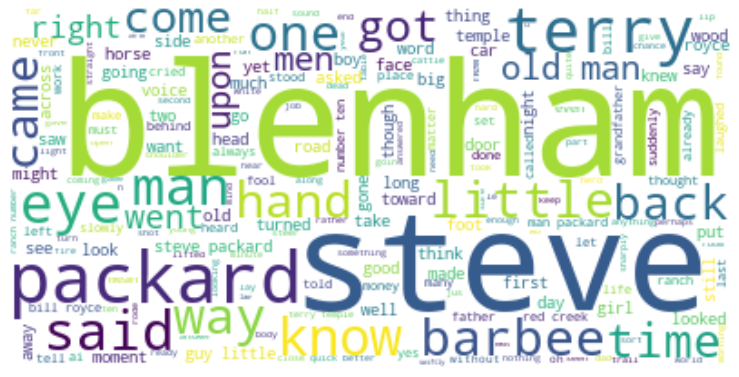

In [91]:
plt.figure(figsize = (13, 13))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [92]:
print(Counter(corpus_4).most_common(5))

[('steve', 542), ('packard', 541), ('blenham', 524), ('man', 445), ('terry', 409)]
